# Quantum tomography GHZ-checker

Check for the hidden state is GHZ state or not?

<img src='../../images/binho_checkstate.png' width = 500px/>

It looks like W state case:

<img src='../../images/check_ghz_state.png'/>

In [2]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../')
import qtm.base, qtm.constant, qtm.nqubit, qtm.onequbit

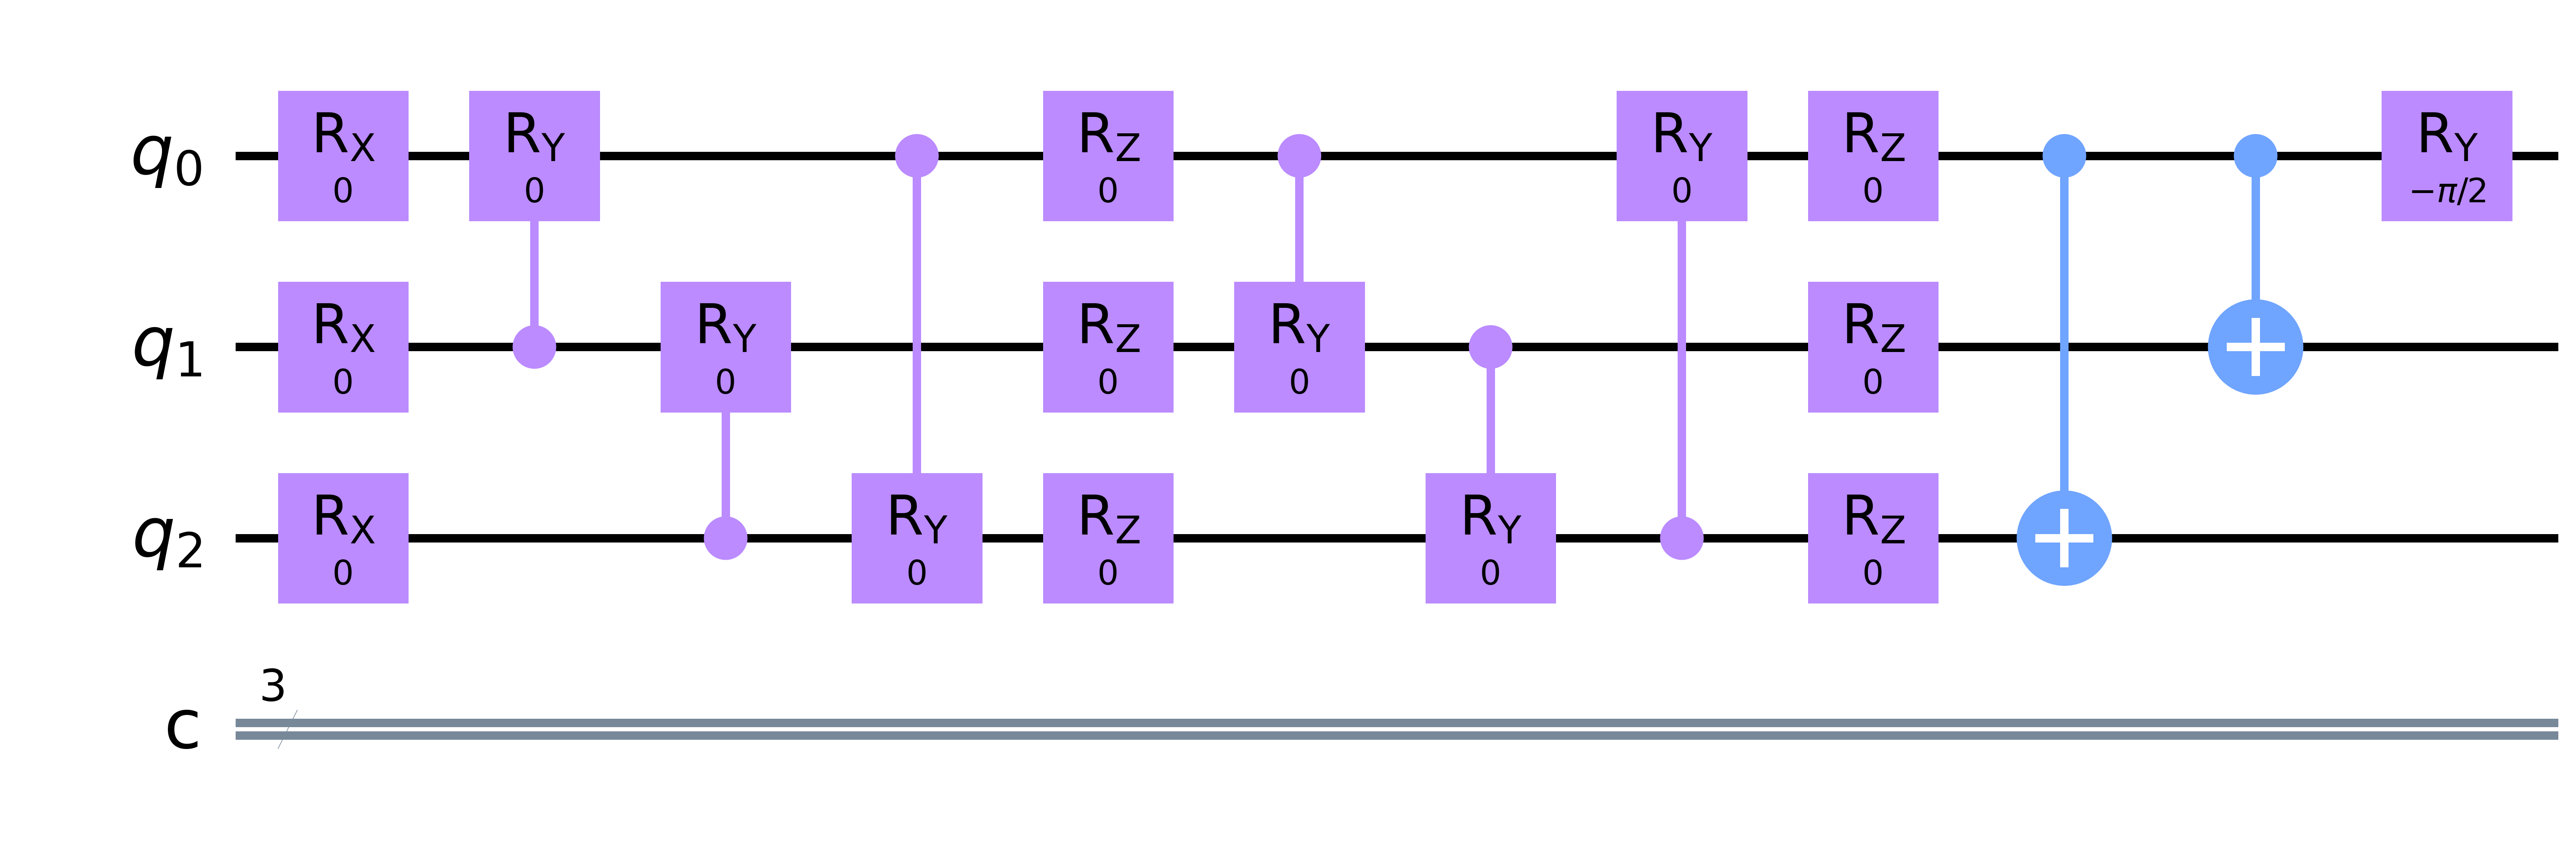

In [7]:

num_qubits = 3
# For arbitrary initial state
num_layers = 1
thetas = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*num_layers*5)
thetas = np.zeros(num_qubits*num_layers*5)
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_GHZchecker_koczor(qc, thetas, 1, np.pi/2)
qc.draw('mpl', scale = 10)

In [61]:
# Init parameters
num_qubits = 2
# For arbitrary initial state
num_layers = 2
thetas = np.ones(num_qubits*num_layers*5)
# For determine GHZ state
theta = np.pi / 2

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetass, loss_values = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_GHZchecker_koczor, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_fubini_study,
    optimizer = qtm.base.adam,
    verbose = 1,
    num_layers = num_layers,
    theta = theta,
    is_return_all_thetas = True
)


Step: 100%|██████████| 100/100 [02:13<00:00,  1.34s/it]


In [62]:
np.savetxt("../../experiments/linear_ansatz_ghz/" + str(num_qubits) + "/loss_values_adam.csv", loss_values, delimiter=",")
np.savetxt("../../experiments/linear_ansatz_ghz/" + str(num_qubits) + "/thetass_adam.csv", thetass, delimiter=",")

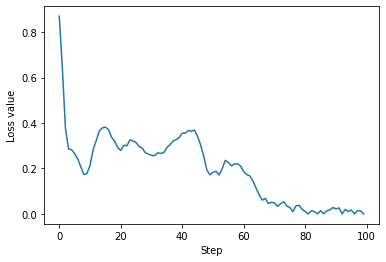

In [63]:
# Plot loss value in 100 steps
plt.plot(loss_values)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

In [64]:
traces = []
fidelities = []
for thetas in thetass:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_koczor_state(qc, thetas, num_layers = num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_ghz_state(qc1, theta = theta)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../../experiments/linear_ansatz_ghz/" + str(num_qubits) + "/traces_adam.csv", traces, delimiter=",")
np.savetxt("../../experiments/linear_ansatz_ghz/" + str(num_qubits) + "/fidelities_adam.csv", fidelities, delimiter=",")

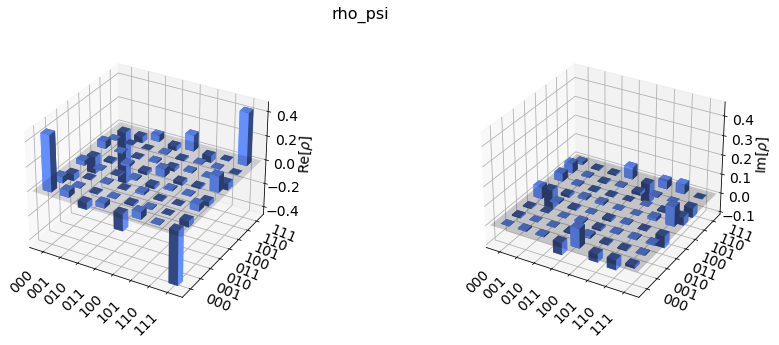

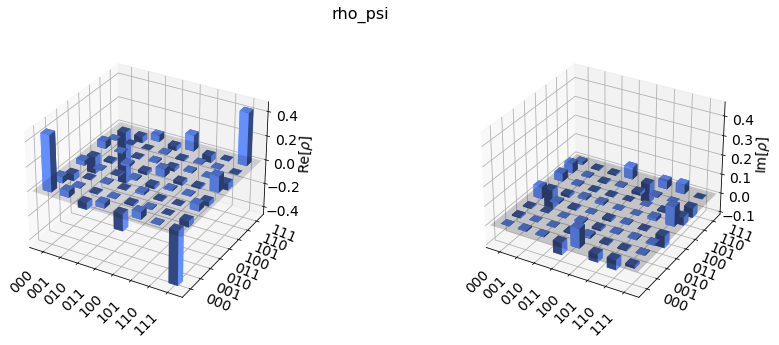

In [6]:
qiskit.visualization.plot_state_city(rho_psi, title = 'rho_psi')

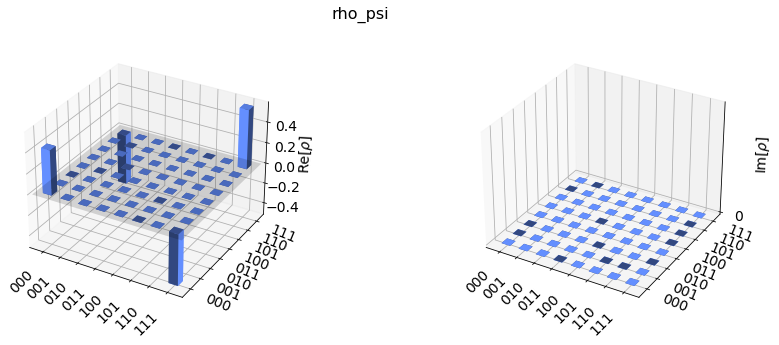

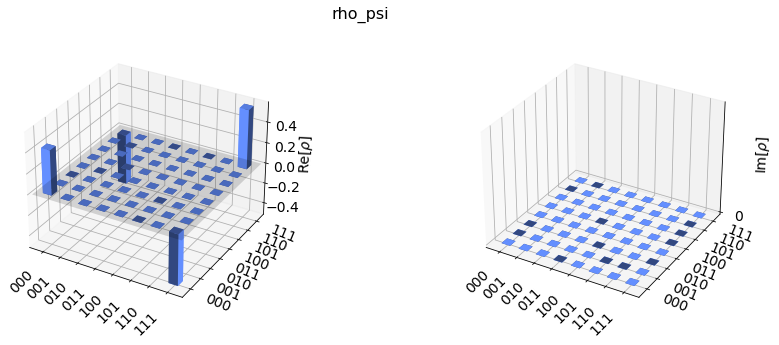

In [7]:
qiskit.visualization.plot_state_city(rho_psi_hat, title = 'rho_psi')